# Analyse univariée et bivariée

**Importation des données**

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set()

figsize = (8, 7)
rcParams['figure.figsize'] = figsize

data = pd.read_table("data/vispremv.dat", sep=' ')
data.columns = data.columns.str.upper()
data.shape

(1063, 54)

Les données proviennent du Github de [Wikistat](http://wikistat.fr/). Nous utiliserons les variables suivantes : 
* **FAMIQ** : Situation familiale
* **SEXEQ** : Sexe (qualitatif)
* **AGER** : Age en années
* **PCSPQ** : Catégorie socio-professionnelle (code num)
* **MOYRVL** : Moyenne des mouvements nets créditeurs des 3 mois en Kf
* **CARVP** : Possession de la carte VISA Premier

## 1. Analyse univariée

L'analyse descriptive fournit un résumé synthétique des variables quantitatives et qualitatives. On parle d'analyse univariée lorsqu'on étudie les variables séparément.

### A. Variable quantitative

#### a. Tendance centrale

La tendance centrale est une valeur qui résume la série statistique :

* **Moyenne** : La moyenne indique la tendance centrale d'une série statistique.  Elle est égale la somme des observations divisée par l’effectif. Elle est très sensible aux valeurs extrêmes 
* **Médiane** : Comme la moyenne, la médiane fournit égale une tendance centrale d'une série. Elle correspond à la valeur qui divise la série en parties d'effectif égal. Elle est plus robuste en face valeurs extrêmes.
* **1er quartile** : C'est la valeur qui sépare les 25% inférieurs des données.
* **3ème quartile** : C'est la valeur qui sépare les 75% inférieurs des données.
* **Mode** : Le mode d'une série statistique, est la valeur observée la plus fréquente

In [2]:
print('Variable age : ')
print('Moyenne = {:>11}'.format(round(data.AGER.mean(), 2)))
print('Mediane = {:>8}'.format(int(data.AGER.median())))
print('Mode = {:>11}'.format(int(data.AGER.mode())))
print('1er quartile = {:>3}'.format(int(data.AGER.quantile(0.75))))
print('3ème quartile = {}'.format(int(data.AGER.quantile(0.25))))

Variable age : 
Moyenne =       42.57
Mediane =       43
Mode =          42
1er quartile =  52
3ème quartile = 33


#### b. Mesure de dispersion

Les mesures de dispersion indiquent la variable de la série étudiée :

* **Variance** : La variance permet de caractériser la dispersion de la série autour de la moyenne. C'est la moyenne arithmétique des carrés des écarts à la moyenne. 
* **Ecart-type** : C'est la racine carrée de la variance. Contrairement à la variance, l'écart-type a la même unité que la moyenne (on pourra les additionner).
* **Etendue** : C'est l'écart entre la plus grande et la plus petite valeur d'une série statistique. Elle est très sensible aux valeurs extrêmes.
* **Intervalle interquartile** : C'est l'écart entre le premier et le troisième quartile.

In [3]:
print('Variable age : ')
print('Variance = {:>20}'.format(round(data.AGER.var(), 2)))
print('Ecart-type = {:>19}'.format(round(data.AGER.std(), 2)))
print('Etendue = {:>19}'.format(int(data.AGER.max() -  data.AGER.min())))
print('Intervalle interquartile = {}'.format(int(data.AGER.quantile(0.75) - data.AGER.quantile(0.25))))

Variable age : 
Variance =                141.9
Ecart-type =               11.91
Etendue =                  47
Intervalle interquartile = 19


#### c. Représentation graphique

* **Histogramme** : Montre la répartition des données

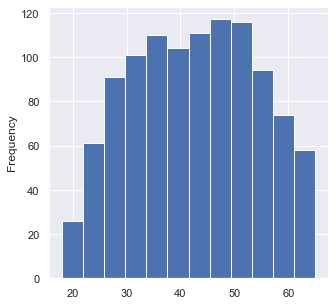

In [4]:
_ = data["AGER"].plot.hist(bins=12, figsize=(5, 5))

* **Boite moustache** : Représente les statistiques (médiane, quartiles, minimum, maximum ou déciles) sous forme graphique

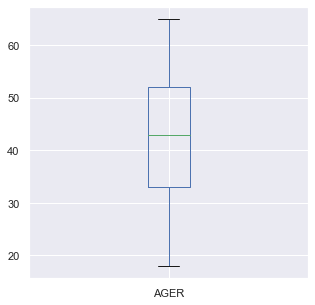

In [5]:
_ = data["AGER"].plot.box(figsize=(5, 5))

### B. Variable qualitative

Le résumé d'une variable qualitative est souvent obtenu à l'aide de graphique. Cela permet :

* Le mode, la modalité la plus représentée
* Les fréquences des modalités

* **Diagramme en barres**

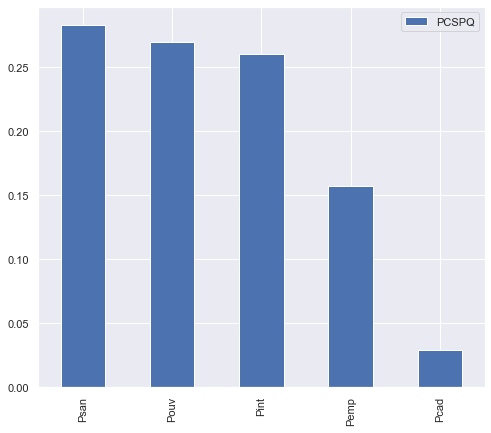

In [6]:
x = data['PCSPQ'].value_counts(normalize=True).to_frame()
ax = x.plot.bar()

* **Diagramme en secteurs**

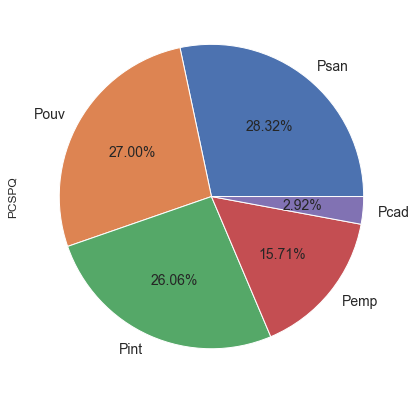

In [7]:
x = data['PCSPQ'].value_counts().to_frame()
ax = x.plot.pie(subplots=True, figsize=(7, 7), autopct='%1.2f%%', legend = False, fontsize=14)

## 2. Analyse bivariée

L'analyse bivariée étudie la relation entre deux variables.

## A. Entre deux variables quantitatives

* **Coefficient de corrélation de Pearson** : permet savoir s'il existe une relation linéaire entre deux variables quantitatives :
 * proche de 1 :  forte relation linéaire positive
 * proche de 0 : absence de relation linéaire 
 * proche de -1 : forte relation linéaire négative

In [8]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data["MOYRVL"], data["AGER"])
print('Correlation de Pearson : {:.3f}'.format(corr))

Correlation de Pearson : 0.208


* Le **coefficient de Spearman** permet de détecter des tendances monotones et a la même interprétation que celui de Pearson.

In [9]:
from scipy.stats import spearmanr
corr, _ = spearmanr(data["MOYRVL"], data["AGER"])
print('Correlation de Spearman : {:.3f}'.format(corr))

Correlation de Spearman : 0.220


* **Nuage de point**

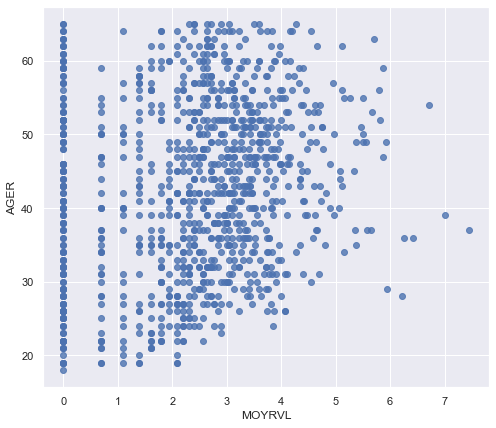

In [10]:
_ = sns.regplot(x=data["MOYRVL"], y=data["AGER"], fit_reg=False)

## B. Entre deux variables qualitatives

* **Tableau de contingence** 

In [11]:
pd.crosstab(data['SEXEQ'], data['CARVP'])

CARVP,Cnon,Coui
SEXEQ,,
Sfem,346,56
Shom,360,301


* **Tableau de contingence en fréquence** 

Profils ligne

In [12]:
pd.crosstab(data['SEXEQ'], data['CARVP'], normalize='index')

CARVP,Cnon,Coui
SEXEQ,,
Sfem,0.860697,0.139303
Shom,0.544629,0.455371


Profils colonne

In [13]:
pd.crosstab(data['SEXEQ'], data['CARVP'], normalize='columns')

CARVP,Cnon,Coui
SEXEQ,,
Sfem,0.490085,0.156863
Shom,0.509915,0.843137


* **Représentation graphique**  

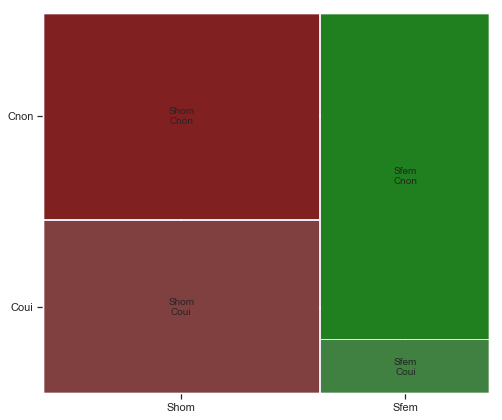

In [14]:
mosaic(data, ['SEXEQ', 'CARVP'])
plt.show()

* **Test d'indépendance du khi** : permet de tester s'il y a une liaison entre deux variables qualitatives.  

Exemple : Le sexe a-t-il un lien avec une possession d'une carte visa premier.   

**H0** : il n'y a pas de différence entre les proportions des deux groupes (La possession d'une carte visa premier ne dépend pas de sexe)

In [15]:
tbc = pd.crosstab(data['SEXEQ'], data['CARVP'])
tbc

CARVP,Cnon,Coui
SEXEQ,,
Sfem,346,56
Shom,360,301


In [16]:
from scipy.stats import chi2_contingency
st_chi2, st_p, st_dof, st_exp = chi2_contingency(tbc)

print('Statistique khi2 = {:.2f}'.format(st_chi2))
print('La p-value = {:.4f}'.format(st_p))

Statistique khi2 = 110.54
La p-value = 0.0000


La p-valeur est inférieure à 5%. On rejette H0, il y a une différence significative les deux groupes étudiés.

## C. Entre une variable quantitative et une variable qualitative

**Comparaison de la distribution des groupes**

* **Boxplot par catégorie** 

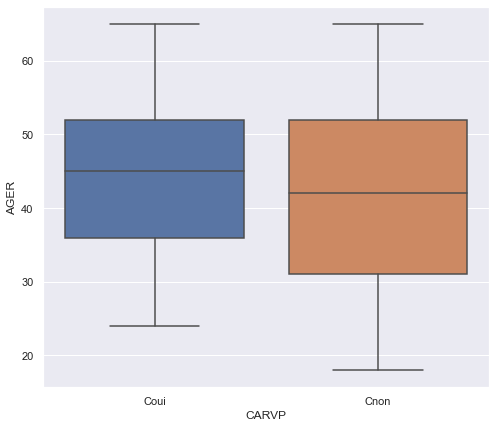

In [17]:
_ = sns.boxplot(y=data['AGER'], x=data['CARVP'])

* **Histogramme par catégorie** 

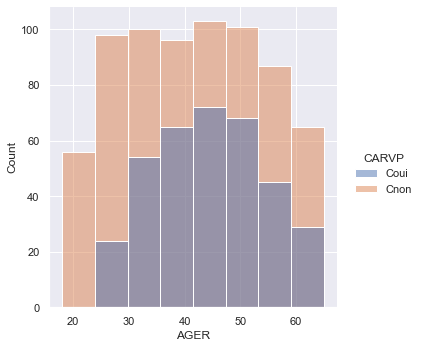

In [18]:
_ = sns.displot(data, x="AGER", hue="CARVP", bins=8)

**Tests statitisques**

**Exemple : Test de comparaison des âges entre ceux qui ont une carte visa premier et n'en ont pas**

In [19]:
x = data["AGER"][data["CARVP"] == 'Coui']
y = data["AGER"][data["CARVP"] == 'Cnon']

Testons d'abord la normalité des distributions des groupes

In [20]:
scipy.stats.shapiro(x)

ShapiroResult(statistic=0.9801973104476929, pvalue=8.051740587688982e-05)

In [21]:
scipy.stats.shapiro(y)

ShapiroResult(statistic=0.9646815657615662, pvalue=5.1695310358812474e-12)

Les p-value étant très faible, on rejette l’hypothèse d’une normalité des deux distributions. Nous appliquons le test de Mann-Whitney pour comparer les deux médianes.

In [22]:
scipy.stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=108520.5, pvalue=0.00010655693472578946)

L'hypothèse nulle d'égalité des médianes des deux groupes est rejeté car la p-value est très faible.

**Références** :    
[Virginie Jourdan : Statistiques bivariées](http://sspsd.u-strasbg.fr/IMG/pdf/Cours_seance_1_et_2.pdf)     
[Wikistat: Statistique & Machine Learning de Statisticien à Data Scientist](http://wikistat.fr/)